In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from pandas.api.types import is_numeric_dtype, is_object_dtype
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

sns.set(style="whitegrid")

In [15]:
# 1. Load and Merge
txn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_transaction.csv')
idt = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train_identity.csv')

df = txn.merge(idt, on='TransactionID', how='left')
print('Shape:', df.shape)

Shape: (590540, 434)


In [16]:
# Define the features
realistic_features = [
    'TransactionID', 'TransactionDT', 'TransactionAmt', 'ProductCD',
    'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
    'addr1', 'addr2', 'dist1', 'dist2',
    'P_emaildomain', 'R_emaildomain',
    'DeviceType', 'DeviceInfo',
    'isFraud'
]

# Subset the dataset
df_realistic = df[realistic_features]

# Optional: Preview the subset
display(df_realistic.head())


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,DeviceType,DeviceInfo,isFraud
0,2987000,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,NaN,NaN,0
1,2987001,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,NaN,NaN,0
2,2987002,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,NaN,NaN,0
3,2987003,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,NaN,NaN,0
4,2987004,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,mobile,SAMSUNG SM-G892A Build/NRD90M,0


In [17]:
# Basic stats
display(df_realistic.info())
display(df_realistic.describe())
display(df_realistic.isnull().sum().sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TransactionID   590540 non-null  int64  
 1   TransactionDT   590540 non-null  int64  
 2   TransactionAmt  590540 non-null  float64
 3   ProductCD       590540 non-null  object 
 4   card1           590540 non-null  int64  
 5   card2           581607 non-null  float64
 6   card3           588975 non-null  float64
 7   card4           588963 non-null  object 
 8   card5           586281 non-null  float64
 9   card6           588969 non-null  object 
 10  addr1           524834 non-null  float64
 11  addr2           524834 non-null  float64
 12  dist1           238269 non-null  float64
 13  dist2           37627 non-null   float64
 14  P_emaildomain   496084 non-null  object 
 15  R_emaildomain   137291 non-null  object 
 16  DeviceType      140810 non-null  object 
 17  DeviceInfo

None

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,isFraud
count,5.905400e+05,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,238269.000000,37627.000000,590540.000000
mean,3.282270e+06,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,118.502180,231.855423,0.034990
std,1.704744e+05,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,371.872026,529.053494,0.183755
min,2.987000e+06,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,3.000000,7.000000,0.000000
50%,3.282270e+06,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,8.000000,37.000000,0.000000
75%,3.429904e+06,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,24.000000,206.000000,0.000000
max,3.577539e+06,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,10286.000000,11623.000000,1.000000


,0
dist2,552913
DeviceInfo,471874
R_emaildomain,453249
DeviceType,449730
dist1,352271
P_emaildomain,94456
addr1,65706
addr2,65706
card2,8933
card5,4259


In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Work on a copy
df = df_realistic.copy()

In [19]:
# === Step 1: Drop irrelevant feature
df.drop(columns=['TransactionID'], inplace=True)

In [20]:
# === Step 2: Time-based feature engineering
df['TransactionHour'] = (df['TransactionDT'] // 3600) % 24
df['TransactionDay'] = (df['TransactionDT'] // (3600 * 24))
df.drop(columns=['TransactionDT'], inplace=True)

In [21]:
# === Step 3: Fill missing values for numeric columns
numeric_cols = ['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2']

for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].fillna(-999)  # Use a distinct missing value marker

In [22]:
# === Step 4: Fill and encode categorical columns
cat_cols = ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'DeviceType', 'DeviceInfo']

for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].fillna('missing').astype(str)



In [23]:
# Simplify DeviceInfo if present
if 'DeviceInfo' in df.columns:
    df['DeviceInfo'] = df['DeviceInfo'].str.extract(r'(^[A-Za-z]+)').fillna("unknown")

# Label encode categoricals
for col in cat_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# === Final check
display("Preprocessing complete.")
display("Final shape:", df.shape)
display("Feature sample:", df.head(3))

'Preprocessing complete.'

'Final shape:'

(590540, 19)

'Feature sample:'

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,DeviceType,DeviceInfo,isFraud,TransactionHour,TransactionDay
0,68.5,4,13926,-999.0,150.0,1,142.0,1,315.0,87.0,19.0,-999.0,31,31,1,273,0,0,1
1,29.0,4,2755,404.0,150.0,2,102.0,1,325.0,87.0,-999.0,-999.0,16,31,1,273,0,0,1
2,59.0,4,4663,490.0,150.0,4,166.0,2,330.0,87.0,287.0,-999.0,36,31,1,273,0,0,1


In [26]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# === Step 1: Split features and target
X = df.drop(columns=['isFraud'])
y = df['isFraud']

# === Step 2: Train/Test Split (Stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Step 3: Define XGBoost Classifier
model = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=12,
    learning_rate=0.03,
    tree_method='hist',  # Or 'gpu_hist' if using GPU
    device='cuda',
    subsample=1.0,
    colsample_bytree=1.0,
    random_state=42,
    eval_metric='auc'
)


# === Step 4: Train the model
model.fit(X_train, y_train)

# === Step 5: Predict and Evaluate
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)

print(f"XGBoost AUC Score: {auc:.4f}")


XGBoost AUC Score: 0.9475


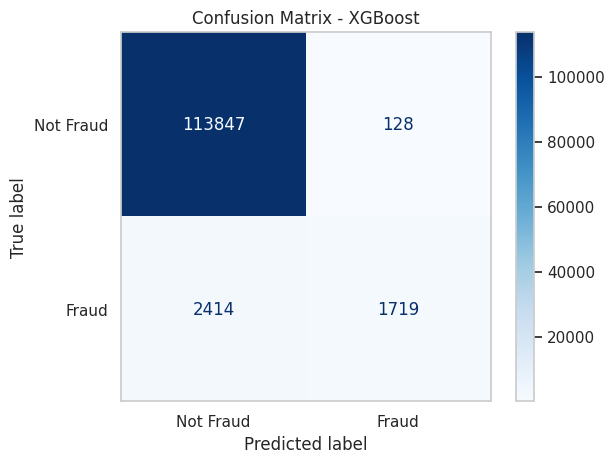


Classification Report:
              precision    recall  f1-score   support

   Not Fraud       0.98      1.00      0.99    113975
       Fraud       0.93      0.42      0.57      4133

    accuracy                           0.98    118108
   macro avg       0.95      0.71      0.78    118108
weighted avg       0.98      0.98      0.97    118108



In [28]:
from sklearn.metrics import classification_report

# === Step 1: Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - XGBoost")
plt.grid(False)
plt.show()

# === Step 2: Classification Report
report = classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud'])
print("\nClassification Report:")
print(report)
